In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import h5py

/Users/diegobarbosa/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
f1=h5py.File('density.h5')
dataset1=f1['density']

In [3]:
dens=np.array(dataset1)

In [4]:
cof=np.fft.fftn(dens)[0:256//2+1,0:256//2+1,0:256//2+1]

In [5]:
absol=np.abs(cof)**2

In [6]:
kx=np.fft.rfftfreq(256)*256/2000
ky=np.fft.rfftfreq(256)*256/2000
kz=np.fft.rfftfreq(256)*256/2000

In [7]:
kmin=np.min(1.0/2000)
kmax=np.min(0.5*256.0/2000.0)

In [8]:
kbins=np.arange(kmin,kmax,kmin)
N=len(kbins)

In [9]:
kx3d,ky3d,kz3d=np.meshgrid(kx,ky,kz, indexing="ij")
k=np.sqrt(kx3d**2 + ky3d**2 + kz3d**2)


In [10]:
nx,ny,nz=dens.shape

In [11]:
def fftrans(dens):
    nx,ny,nz=dens.shape
    s=np.fft.fftn(dens)[0:nx//2+1,0:ny//2+1,0:nz//2+1]
    s=8.0*s/(nx*ny*nz)
    return np.abs(s)**2

In [14]:
ffden=fftrans(dens)
whichbin=np.digitize(k.flat,kbins)
ncount=np.bincount(whichbin)

In [15]:
P_spectrum=np.zeros(len(ncount)-1)

In [16]:
for n in range(1,len(ncount)):
    P_spectrum[n-1]=np.sum(ffden.flat[whichbin==n])

In [17]:
k=0.5*(kbins[0:N-1]+kbins[1:N])
P_spectrum=P_spectrum[1:N]

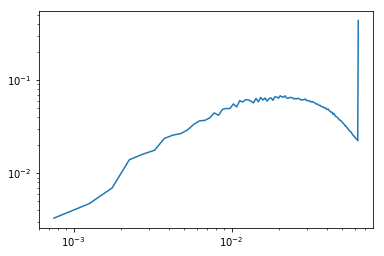

In [18]:
plt.loglog(k,P_spectrum)